# Importing Data Set

In [1]:
import pandas as pd
df=pd.read_csv("customer application subscription.csv")

In [2]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


<center><h1> Complete Exploratory Data Analysis</h1>

## overall explaination of dataset

In [3]:
print("\t\t\tDataset Statistics")
print("Number of variables:-",len(df.columns))
print("Number of observations:-",df.shape[0])
print("Missing Values:-",df.isna().sum().sum())
print("Missing Values %:-",round(df.isna().sum().sum()/df.shape[0]*100,3))
print("Duplicate rows:-",df[df.duplicated(keep="first")].shape[0])
print("Duplicate rows%:-",round(df[df.duplicated(keep="first")].shape[0]/df.shape[0]*100,3))
print("Variable types:-")
a=pd.crosstab(df.dtypes,columns="Count")
for i in pd.crosstab(df.dtypes,columns="Count").index:
    print("\t",str(i).split()[0],a.loc[i][0])

			Dataset Statistics
Number of variables:- 12
Number of observations:- 50000
Missing Values:- 18926
Missing Values %:- 37.852
Duplicate rows:- 15
Duplicate rows%:- 0.03
Variable types:-
	 int64 8
	 object 4


## conversion of the column into datetime format

In [4]:
df["first_open"]=pd.to_datetime(df["first_open"])
df["enrolled_date"]=pd.to_datetime(df["enrolled_date"])
df['first_open_date'] = [d.date() for d in df['first_open']]
df['first_open_time'] = [d.time() for d in df['first_open']]
df=df.drop("first_open",axis=1)

## Visualization on the basis of first open

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


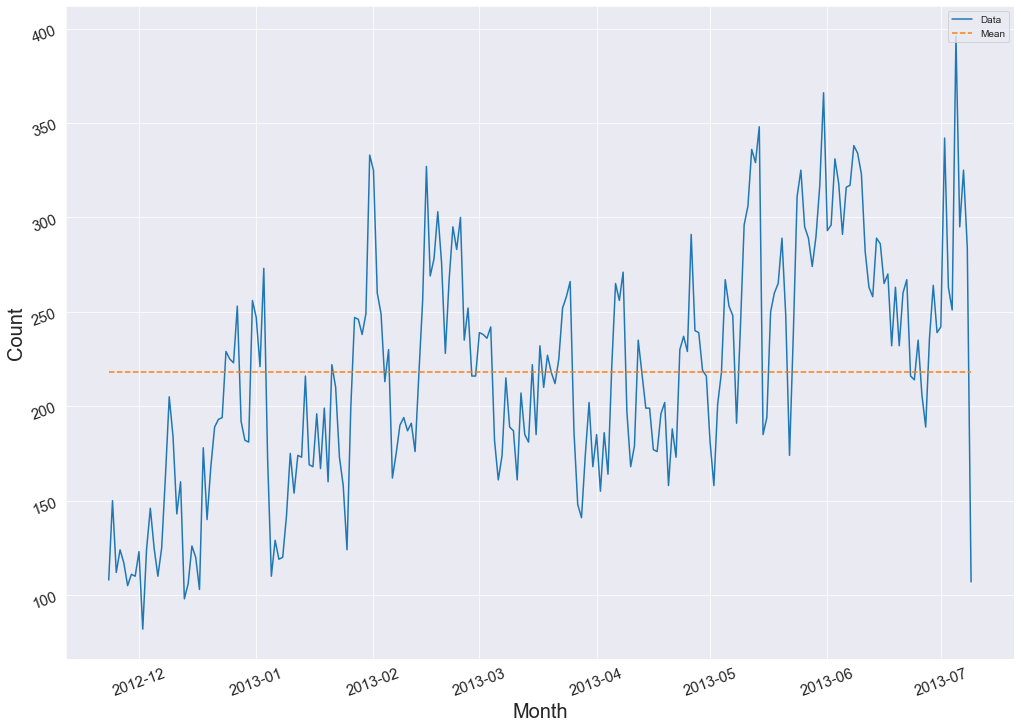

In [5]:
a=pd.crosstab(index=df["first_open_date"],columns="count")
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
%matplotlib inline
x =  np.arange(datetime(2012,11,23), datetime(2013,7,10), timedelta(days=1)).astype(datetime)
y = a["count"]
y_mean = [a["count"].mean()]*len(x)
fig,ax = plt.subplots(figsize=(17,12))
ax.set_xlabel("Month",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=15, labelrotation = 20, color ="k")
data_line = ax.plot(x,y, label='Data')
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

## Visualisation on the basis of day of week

Text(0.5, 1.0, 'Count of On which day user logon')

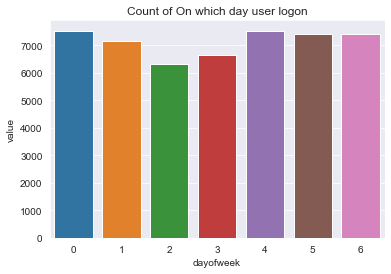

In [6]:
import seaborn as sns
sns.set_style('darkgrid')
ct=pd.crosstab(df["dayofweek"],columns="Count")
stacked = ct.stack().reset_index().rename(columns={0:'value'})
g=sns.barplot(x=stacked.dayofweek, y=stacked.value)
plt.title("Count of On which day user logon")

## Visualization on the basis of hour

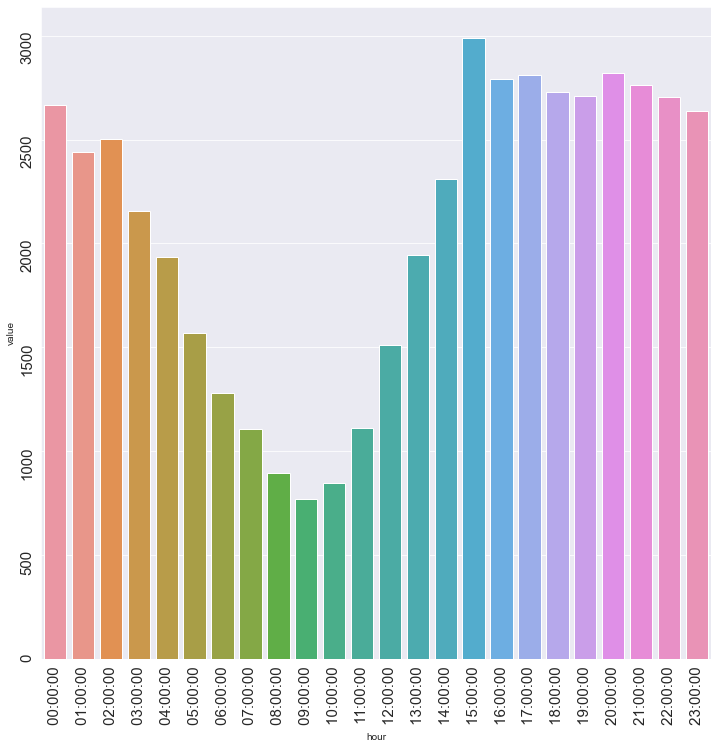

In [7]:
ct=pd.crosstab(df["hour"],columns="Count")
plt.figure(figsize=(12,12))
plt.tick_params(labelsize=15, labelrotation = 90, color ="k")
stacked = ct.stack().reset_index().rename(columns={0:'value'})
g=sns.barplot(x=stacked.hour, y=stacked.value)

## Visualizaion on the basis of age

In [8]:
df["age"].describe()

count    50000.00000
mean        31.72436
std         10.80331
min         16.00000
25%         24.00000
50%         29.00000
75%         37.00000
max        101.00000
Name: age, dtype: float64

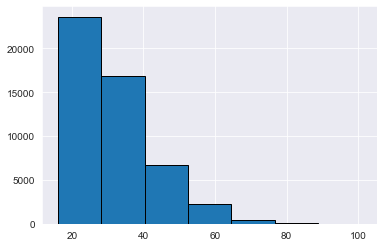

In [9]:
plt.hist(df["age"],edgecolor="black",bins=7)
plt.show()

## Grouping data on the basis of dayofweek

In [10]:
groupedvalues=df.groupby('dayofweek')["numscreens","minigame","used_premium_feature","enrolled","liked"].sum().reset_index()
attributes=list(groupedvalues.columns)[1:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


## Visualizing other  variables

minigame


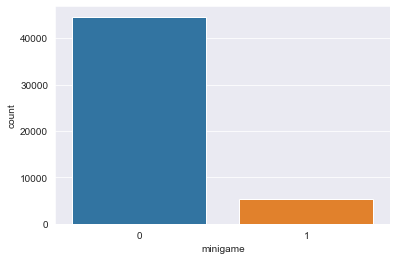

used_premium_feature


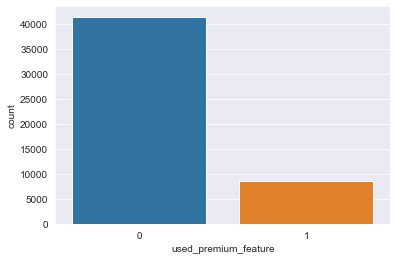

enrolled


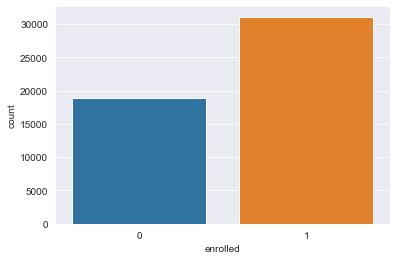

liked


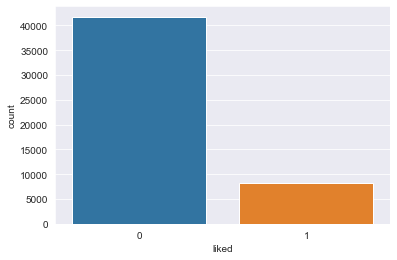

In [11]:
att=attributes[1:]
for i in att:
    print(i)
    sns.countplot(df[i])
    plt.show()

## Visualizing grouped data on the basis of dayofweek

numscreens


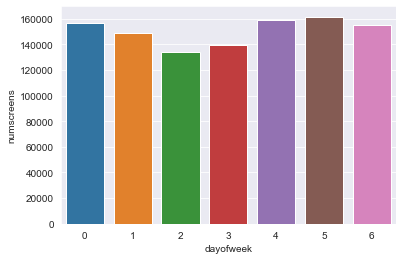

minigame


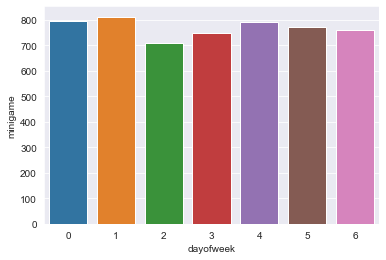

used_premium_feature


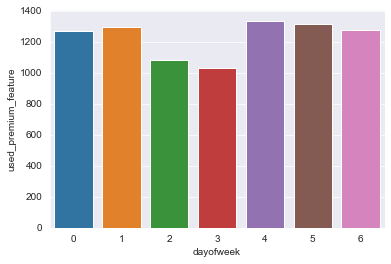

enrolled


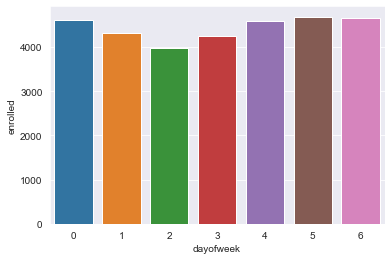

liked


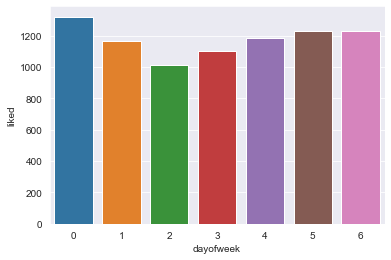

In [12]:
for i in attributes:
    print(i)
    sns.barplot(x="dayofweek",y=i,data=groupedvalues)
    plt.show()

## Grouping data on the basis of hour

In [13]:
groupedvalues2=df.groupby('hour')["numscreens","minigame","used_premium_feature","enrolled","liked"].sum().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


## Visualizing grouped data on the basis of hour

numscreens


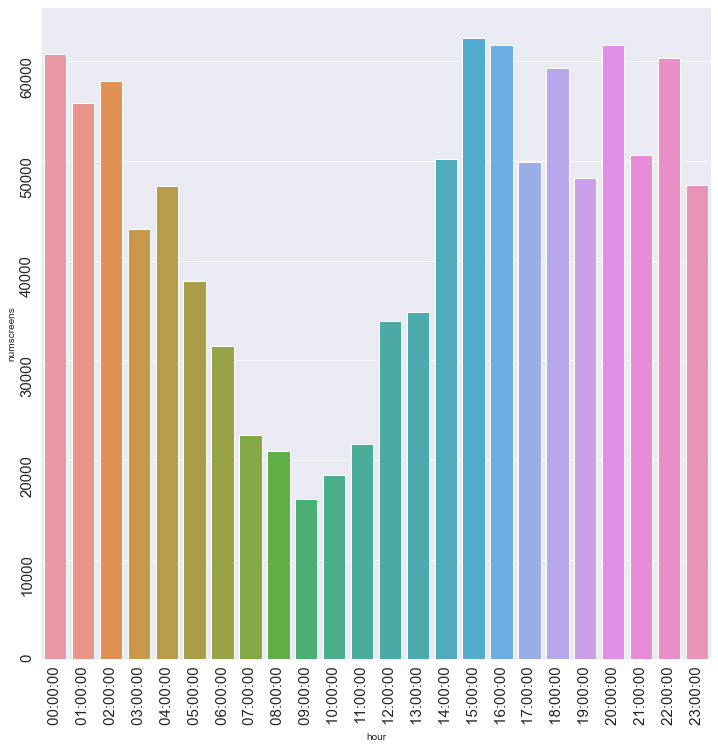

minigame


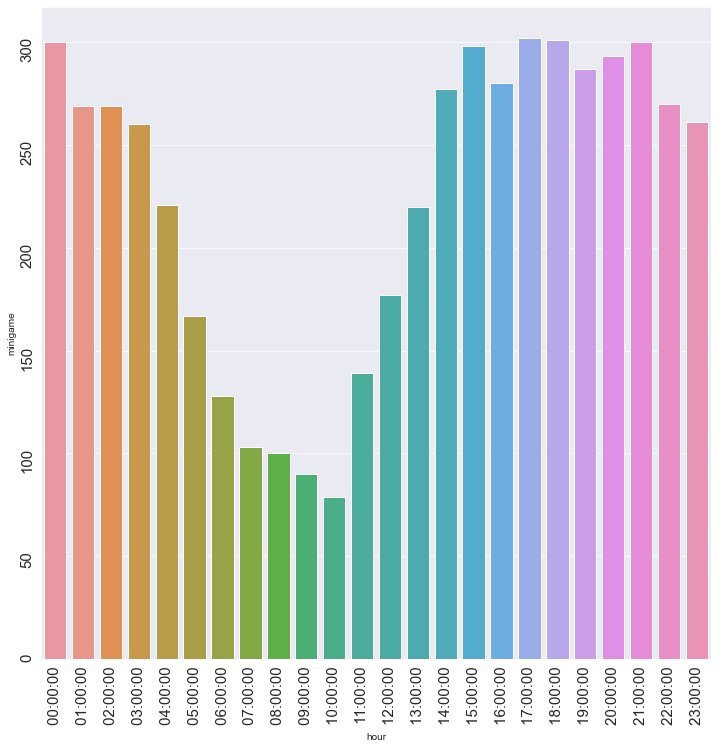

used_premium_feature


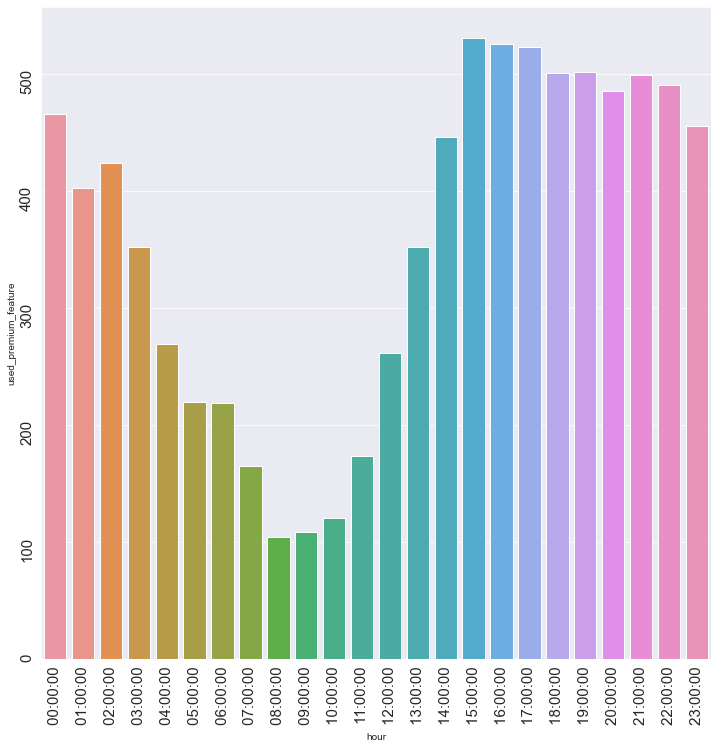

enrolled


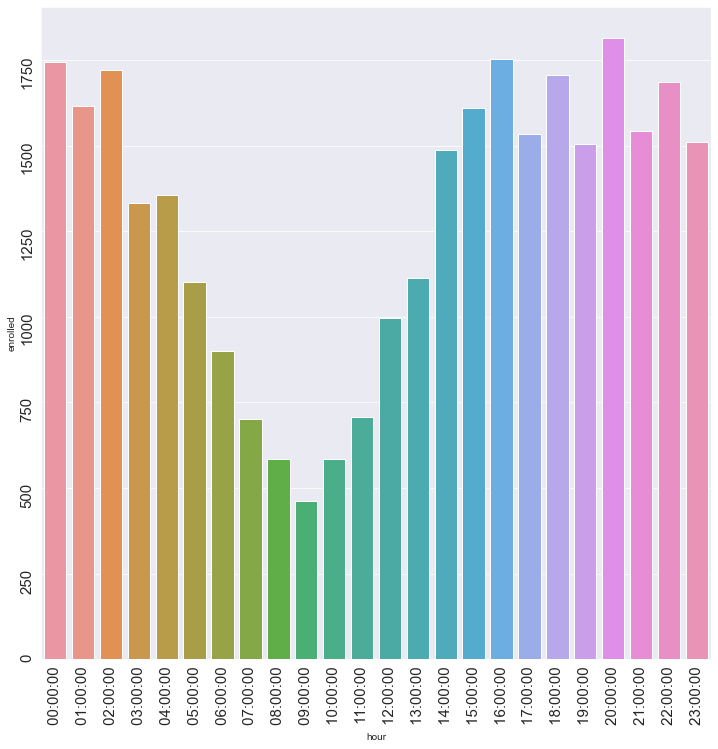

liked


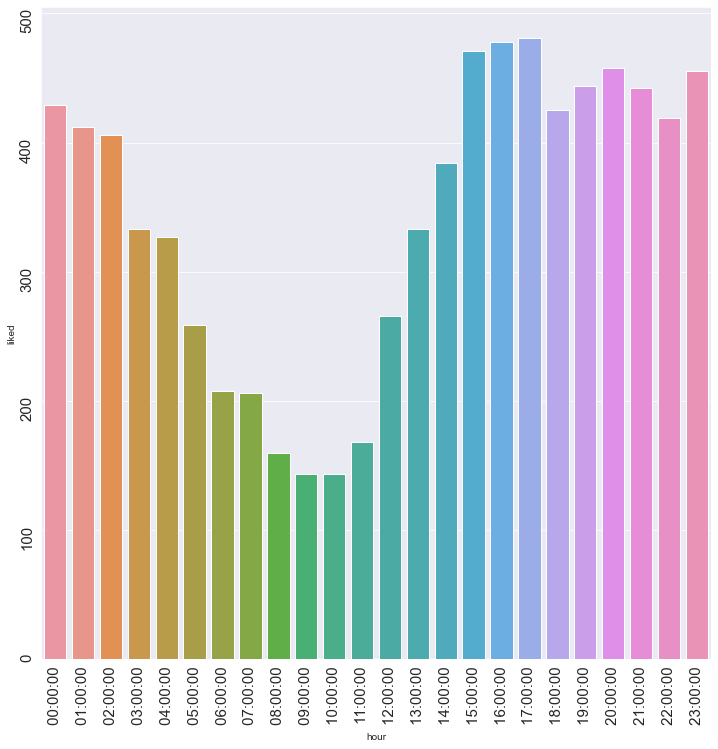

In [14]:
for i in attributes:
    print(i)
    plt.figure(figsize=(12,12))
    plt.tick_params(labelsize=15, labelrotation = 90, color ="k")
    sns.barplot(x="hour",y=i,data=groupedvalues2)
    plt.show()

## Grouping data on the basis of age group

In [15]:
groupedvalues3=df.groupby(pd.cut(df['age'], np.arange(15, 106, 10)))["numscreens","minigame","used_premium_feature","enrolled","liked"].sum().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


## Visualizing grouped data on the basis of age group

numscreens


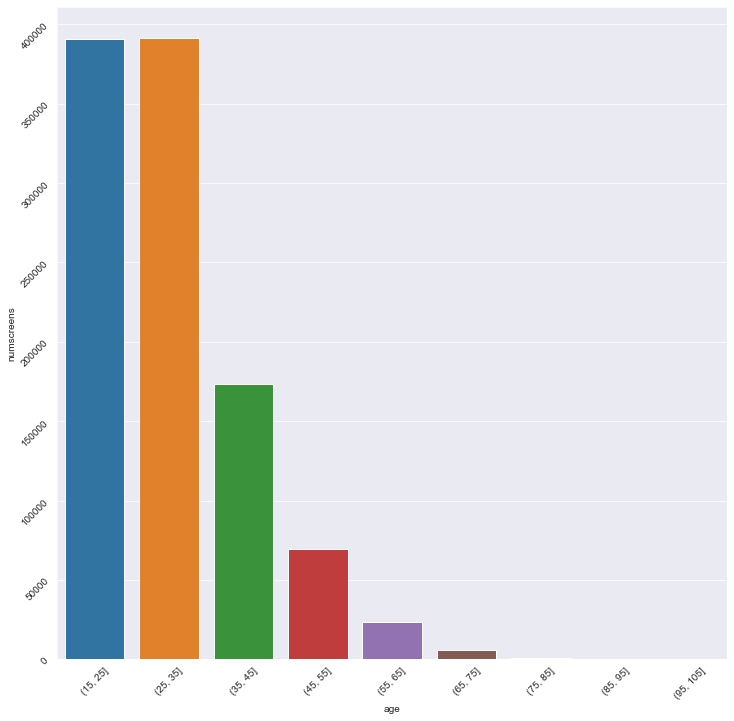

minigame


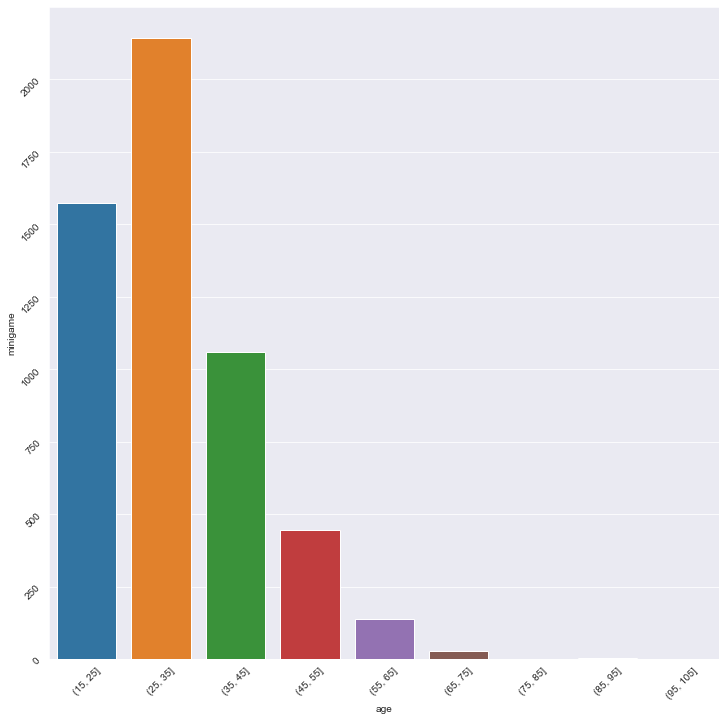

used_premium_feature


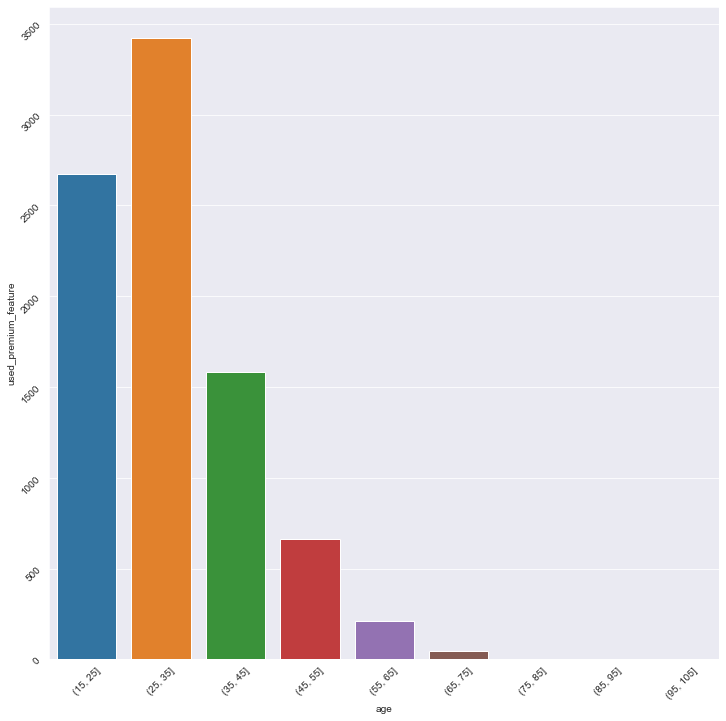

enrolled


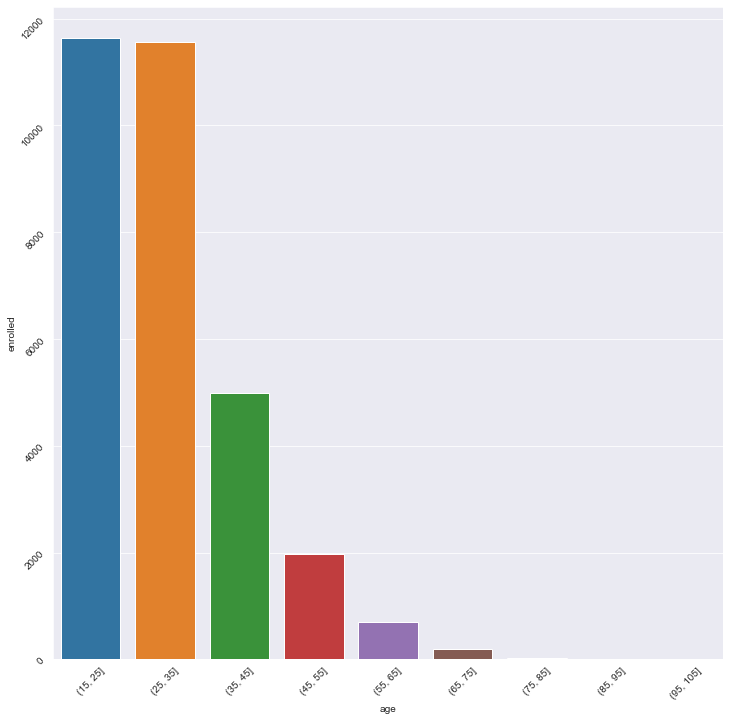

liked


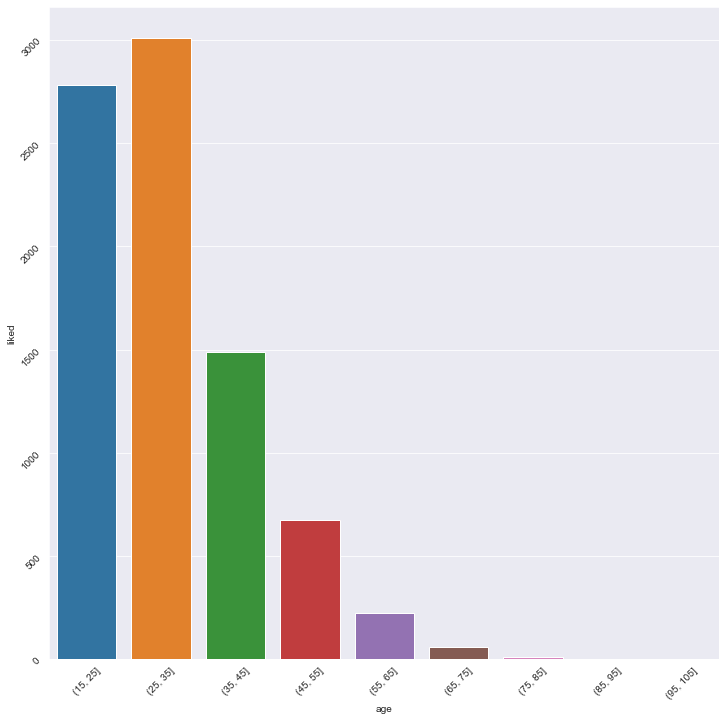

In [16]:
for i in attributes:
    print(i)
    plt.figure(figsize=(12,12))
    plt.tick_params(labelrotation = 45)
    sns.barplot(x="age",y=i,data=groupedvalues3)
    plt.show()

## Feature selection procedure

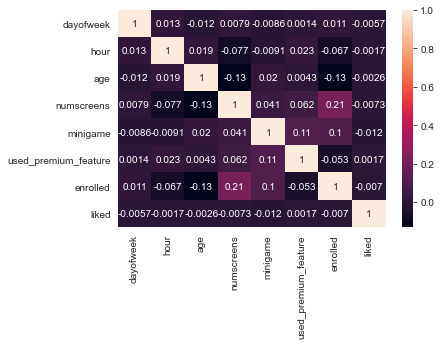

In [17]:
for i in df.index:
    x = df.at[i , 'hour']
    y = x[0:3]
    df.at[i , 'hour'] = y
df["hour"]=df["hour"].astype('int64')
import seaborn as sns
df2 = df.drop(['user',  'enrolled_date'], axis = 1)
sns.heatmap(df2.corr(), annot = True)

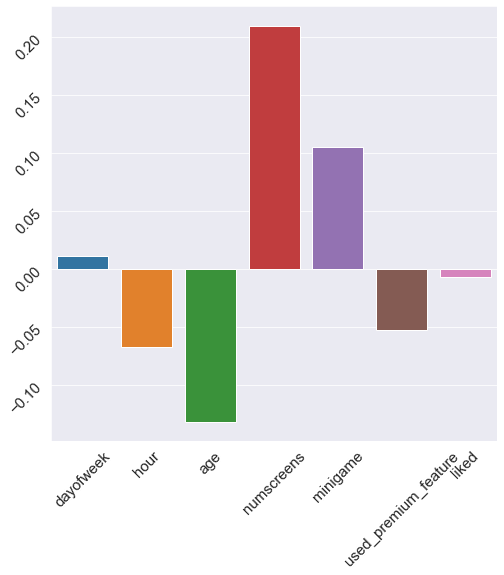

In [18]:
df3 = df2.drop(['enrolled'], axis = 1)
plt.figure(figsize=(8,8))
sns.barplot(x=df3.corrwith(df2.enrolled).index,y=df3.corrwith(df2.enrolled))
plt.tick_params(labelsize=15, labelrotation = 45)

### This means that age,hour,numscreens,minigame and used_prenium_features are related

# Converting the dataframe to its original form

In [1]:
import pandas as pd
df=pd.read_csv('customer application subscription.csv')
df["first_open"]=pd.to_datetime(df["first_open"])
df["enrolled_date"]=pd.to_datetime(df["enrolled_date"])
df['time_to_enrolled']=(df.enrolled_date - df.first_open).astype('timedelta64[h]')

## Resolving outliers

In [2]:
df['time_to_enrolled'].describe()

count    31074.000000
mean       190.791659
std        621.887155
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       5434.000000
Name: time_to_enrolled, dtype: float64

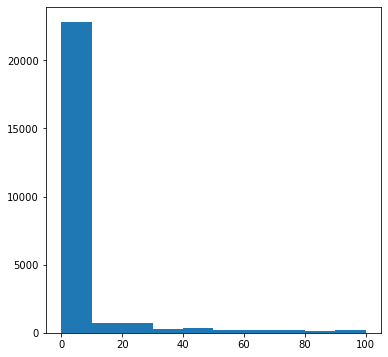

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
plt.hist(df['time_to_enrolled'].dropna(), range = (0,100))
plt.show()

In [4]:
df.loc[df.time_to_enrolled > 50, 'enrolled'] = 0# we did this to overcome the outliers

## Data Preprocessing

#### Conversion of screenlist into string 

In [5]:
for i in range(len(df["screen_list"])):
    df["screen_list"][i]=df["screen_list"][i].split(',')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Transformational encoding of screenlist

In [6]:
from mlxtend.preprocessing import TransactionEncoder 
transactionEncoder = TransactionEncoder()
txnn=transactionEncoder.fit(df["screen_list"]).transform(df["screen_list"])
dfnn=pd.DataFrame(txnn,columns=transactionEncoder.columns_)

In [7]:
df=df.join(dfnn, how="outer")

#### Label encoding of screenlist

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=list(transactionEncoder.columns_)
for i in l:
    try:
        df[i]=le.fit_transform(df[i])
    except:
        pass

In [9]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,WelcomeBankVerification,YourNetwork,idscreen,joinscreen,location,product_review,product_review2,product_review3,product_review4,product_review5
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"[idscreen, joinscreen, Cycle, product_review, ...",15,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"[joinscreen, product_review, product_review2, ...",13,0,0,0,...,0,0,0,1,1,1,1,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"[Splash, Cycle, Loan]",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"[product_review, Home, product_review, Loan3, ...",40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"[idscreen, joinscreen, Cycle, Credit3Container...",32,0,0,1,...,0,0,1,1,0,1,1,0,0,0


#### Conversion of hour into integer

In [10]:
a1=df[["hour","age","numscreens","used_premium_feature","minigame"]]
for i in df.index:
    x = a1.at[i , 'hour']
    y = x[0:3]
    a1.at[i , 'hour'] = y
a1["hour"]=a1["hour"].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
a2=df[transactionEncoder.columns_]

In [12]:
a1=a1.join(a2, how="outer")

In [13]:
a1.head()

,hour,age,numscreens,used_premium_feature,minigame,About,AccountView,AddProperty,AddVehicle,AdverseActions,...,WelcomeBankVerification,YourNetwork,idscreen,joinscreen,location,product_review,product_review2,product_review3,product_review4,product_review5
0,2,23,15,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,1,24,13,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
2,19,23,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,28,40,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,18,31,32,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0


In [14]:
X=a1

In [15]:
Y=df["enrolled"]

## Splitting of data

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression(random_state = 42, penalty = 'l1')
le.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
le.score(xtest,ytest)

0.868

In [37]:
le.score(xtrain,ytrain)

0.8619428571428571

## Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',
max_depth = 4 )

In [39]:
clf_tree.fit( xtrain, ytrain )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
from sklearn import metrics
tree_predict = clf_tree.predict( xtest )
metrics.roc_auc_score( ytest, tree_predict )

0.8661926845683395

#### Hyperparametric tuning

In [41]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],
'max_depth': range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,
tuned_parameters,
cv=10,
scoring='roc_auc')
clf.fit(xtrain, ytrain )

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [42]:
clf.best_score_

0.9128577545361776

In [43]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [44]:
clf_tree2 = DecisionTreeClassifier(criterion = 'gini',
max_depth = 7 )
clf_tree2.fit( xtrain, ytrain )
tree_predict2 = clf_tree2.predict( xtest )
metrics.roc_auc_score( ytest, tree_predict2 )

0.8660748515249421

#### Visualization of tree

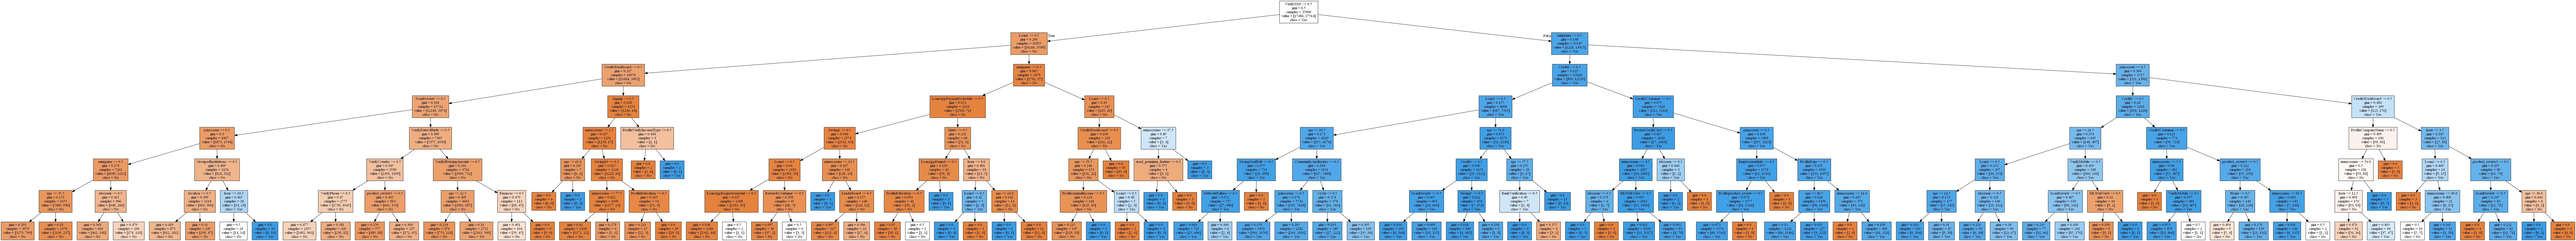

In [45]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
# Export the tree into odt file
export_graphviz( clf_tree2,
out_file = "chd_tree.odt",
feature_names = xtrain.columns,
class_names= ['No', 'Yes'],
filled = True)
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')